## PARTE 3 – Novo dataset Appliances Energy Prediction

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 26. Carregamento e inspeção inicial
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e .describe()).

In [30]:
dados = pd.read_csv("datasets/energydata_complete.csv", sep=",")

In [31]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [32]:
dados.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [33]:
dados['date'] = pd.to_datetime(dados.date, errors='coerce') # transformando as datas para datetime

### 27. Distribuição do consumo
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?


In [34]:
dados['day'] = dados['date'].dt.date
dadosConsumoMedioPorDia = dados.groupby('day')[['Appliances']].mean()

print(dadosConsumoMedioPorDia.sort_values('Appliances').describe())

       Appliances
count  138.000000
mean    97.963041
std     30.470787
min     37.500000
25%     75.572917
50%     92.708333
75%    113.298611
max    188.541667


De acordo com os dados obtidos agrupando os dados em média de consumo diária, podemos dividir em 3 grupos para plotar o nosso histograma: 

Baixo (<75) → dias de quase nada ligado (pouca presença na casa).

Médio (75–110) → rotina normal, casa funcionando.

Alto (>110) → dias de maior atividade (muitos aparelhos ligados, eventos, frio/calor que exige mais aquecimento ou climatização).

<Axes: ylabel='Frequency'>

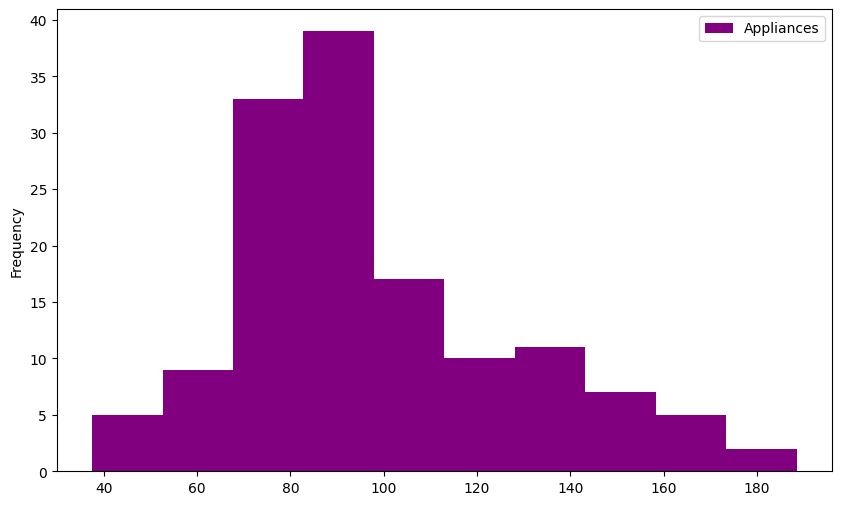

In [35]:
dadosConsumoMedioPorDia.plot(kind='hist', figsize=(10,6), color='purple')

Olhando a distribuição de frequência é possível identificar que levando como critério os cortes/classificações feitas é possível concluir que a maior parte dos dados estão e consumo médio (entre 70 e 110) mas se analisarmos as pontas existem maior concentração de dias de consumo alto (acima de 110) do que de baixo consumo (abaixo de 70).

### 28. Correlações com variáveis ambientais
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?


In [38]:
variaveis = ['T1','T2','T3','T4','T5','T6','T7','T8','T9',
             'RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9',
             'T_out','RH_out']

for v in variaveis:
    corr = dados['Appliances'].corr(dados[v])
    print(f"Correlação Appliances x {v}: {corr:.3f}")


Correlação Appliances x T1: 0.055
Correlação Appliances x T2: 0.120
Correlação Appliances x T3: 0.085
Correlação Appliances x T4: 0.040
Correlação Appliances x T5: 0.020
Correlação Appliances x T6: 0.118
Correlação Appliances x T7: 0.026
Correlação Appliances x T8: 0.040
Correlação Appliances x T9: 0.010
Correlação Appliances x RH_1: 0.086
Correlação Appliances x RH_2: -0.060
Correlação Appliances x RH_3: 0.036
Correlação Appliances x RH_4: 0.017
Correlação Appliances x RH_5: 0.007
Correlação Appliances x RH_6: -0.083
Correlação Appliances x RH_7: -0.056
Correlação Appliances x RH_8: -0.094
Correlação Appliances x RH_9: -0.051
Correlação Appliances x T_out: 0.099
Correlação Appliances x RH_out: -0.152


Nenhum fator ambiental tem forte relação com Appliances.

As variáveis com maior correlação positiva: T2 e T6.

A variável com maior correlação negativa: RH_out.

O consumo é muito mais influenciado pelo comportamento humano do que pelo clima, mas algumas tendências sutis podem ser percebidas.

### 29. Normalização dos dados
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores

In [39]:
from sklearn.preprocessing import MinMaxScaler

colunas_numericas = dados.select_dtypes(include='number').columns

scaler = MinMaxScaler()

dadosNormalizados = pd.DataFrame(
    scaler.fit_transform(dados[colunas_numericas]),
    columns= colunas_numericas,
    index=dados.index
)

dadosNormalizados.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


### 30. PCA
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?


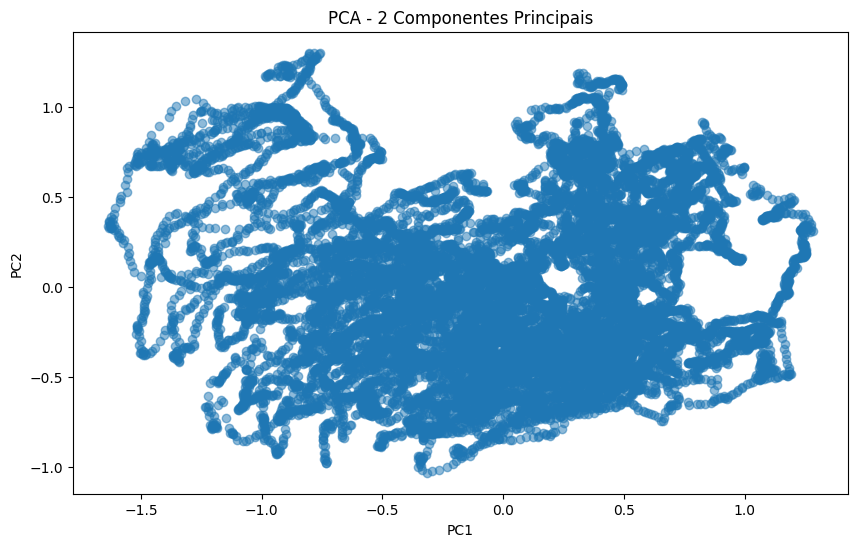

Variância explicada por componente: [0.36089668 0.20905617]


In [41]:
from sklearn.decomposition import PCA

X = dadosNormalizados # Todas as variáveis numéricas em escala

# Criando pca para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Transformar em DataFrame para plotar
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Plotar
plt.figure(figsize=(10,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title("PCA - 2 Componentes Principais")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Explicação da variância
print("Variância explicada por componente:", pca.explained_variance_ratio_)

É possível identificar 3 grupos naturais mas com uma certa cautela porque a variancia explicada pelos 2 componentes só conseguem abordar 56%. Mas essa é uma forma que se pode interpretar os dados: 

PC1 baixo e PC2 alto → grupo de dias com certa combinação de variáveis que “pesam” pouco na primeira direção de variância, mas mais na segunda. Pode representar dias em que talvez o consumo não estava tão relacionado a temperatura por estar baixo.

PC1 médio e PC2 médio/baixo → outro padrão, talvez dias de consumo médio ou comportamento típico.

PC1 médio/alto e PC2 médio/alto → dias com variáveis combinadas que aumentam os dois componentes, possivelmente picos de consumo ou dias especiais (clima diferente ou mais aparelhos ligados).

### 31. Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Variáveis explicativas (X) — só ambientais
X = dadosNormalizados[[
    'T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5',
    'T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9',
    'T_out','RH_out','Press_mm_hg','Windspeed','Visibility','Tdewpoint'
]]

# Variável alvo (y)
y = dadosNormalizados['Appliances']

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

# Avaliação do Modelo
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"R²: {r2:.3f}")
print(f"Erro médio absoluto (MAE): {mae:.3f}")

R²: 0.146
Erro médio absoluto (MAE): 0.050


O modelo de regressão linear múltipla apresenta baixo poder explicativo (R² = 0,146), refletindo que o consumo de eletrodomésticos depende mais do comportamento humano do que de variáveis ambientais. O erro médio absoluto (MAE = 0,050) indica que as previsões estão próximas da média, mas não conseguem capturar os picos e quedas do consumo real.

### 32. Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

y_pred_rf = rf.predict(X)

rmse_rf = np.sqrt(mean_squared_error(y, y_pred_rf))
print(f"RMSE Random Forest: {rmse_rf:.3f}")

RMSE Random Forest: 0.022


O modelo Random Forest apresentou RMSE = 0,022, significativamente menor que o erro médio da regressão linear (MAE = 0,050), indicando maior capacidade de previsão. No entanto, mesmo o Random Forest não consegue explicar completamente o consumo de eletrodomésticos, pois grande parte da variação depende do comportamento humano, não capturado pelas variáveis ambientais.

### 33. K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.


Centroides dos clusters: [[ 67.20975166]
 [566.53104925]
 [287.70197487]]


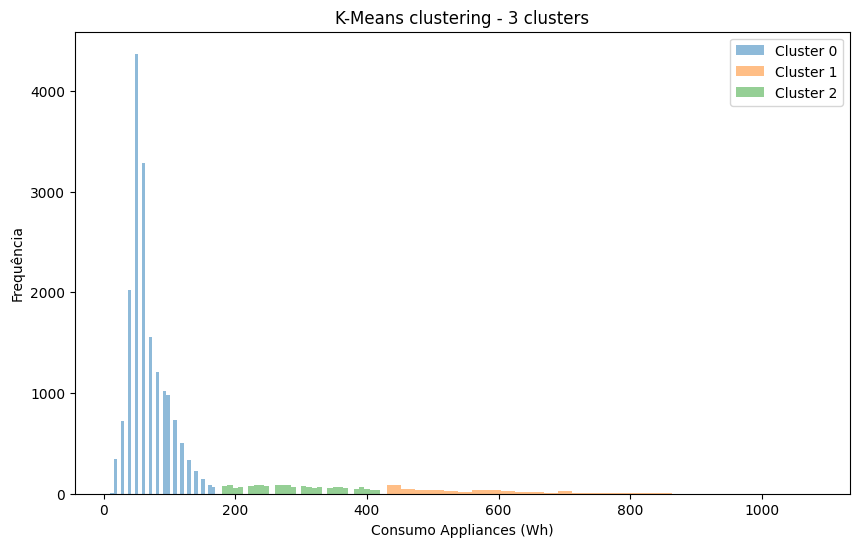

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecionar a coluna de interesse
X = dados[['Appliances']]  # mantendo formato 2D para scikit-learn

# Criar o modelo K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obter os rótulos de cluster para cada ponto
dados['cluster'] = kmeans.labels_

# Centróides
centroids = kmeans.cluster_centers_

print("Centroides dos clusters:", centroids)

# Plotar histogramas com cores por cluster
plt.figure(figsize=(10,6))
for i in range(3):
    plt.hist(dados[dados['cluster']==i]['Appliances'], bins=30, alpha=0.5, label=f'Cluster {i}')
plt.xlabel("Consumo Appliances (Wh)")
plt.ylabel("Frequência")
plt.title("K-Means clustering - 3 clusters")
plt.legend()
plt.show()


In [52]:
agrupamentoClusters = dados.cluster.value_counts()
agrupamentoClusters

cluster
0    17597
2     1671
1      467
Name: count, dtype: int64

A clusterização dos dados de consumo de eletrodomésticos em intervalos de 10 minutos revelou três perfis distintos de uso:

Cluster 0 – Baixo consumo: apresenta alta frequência e amplitude relativamente baixa de consumo, indicando que a maior parte do tempo a casa permanece com aparelhos desligados ou em uso mínimo.

Cluster 2 – Médio consumo: ocorre com frequência menor e apresenta amplitude de consumo intermediária, representando períodos de uso regular de eletrodomésticos.

Cluster 1 – Alto consumo: tem frequência muito baixa, mas amplitude elevada, correspondendo a picos de consumo, possivelmente quando múltiplos aparelhos de alto gasto energético são acionados simultaneamente.

Diferente da análise de média diária, aqui como a medição é a de 10 em 10 minutos o valores altos não influenciam nos baixos e revela que o baixo consumo no intervalo de 10 minutos é muitíssimo mais comum do que o médio e o alto.

### 34. Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

mediana = dados.Appliances.median()
dados['consumo_binario'] = (dados.Appliances > mediana).astype(int) # Separar entre consumo alto e consumo baixo

y = dados.consumo_binario

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) 
# stratify -> os equilibiro de resultado y nos dados de teste e de treino

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3223
           1       1.00      1.00      1.00      2698

    accuracy                           1.00      5921
   macro avg       1.00      1.00      1.00      5921
weighted avg       1.00      1.00      1.00      5921

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3223
           1       1.00      1.00      1.00      2698

    accuracy                           1.00      5921
   macro avg       1.00      1.00      1.00      5921
weighted avg       1.00      1.00      1.00      5921



Tanto a Regressão Logística quanto o Random Forest alcançaram 100% de acurácia. Esse desempenho excepcional pode ser explicado pela distribuição dos dados: como a divisão foi feita exatamente na mediana e havia um grande volume de registros, os modelos conseguiram separar as classes de forma quase trivial, sem margem para erro.

### 35. Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

In [64]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Supondo que você já tenha:
# y_test -> valores reais
# y_pred -> valores previstos pelo modelo

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusão RandomForestClassifier:\n", cm)

cm = confusion_matrix(y_test, y_pred_log)
print("Matriz de Confusão Regressão Logística:\n", cm)

# Métricas Random Forest
print("\nRelatório de Classificação - Random Forest:\n")
print(classification_report(y_test, y_pred_rf, target_names=['Baixo','Alto']))

# Métricas Logistic Regression
print("\nRelatório de Classificação - Regressão Logística:\n")
print(classification_report(y_test, y_pred_log, target_names=['Baixo','Alto']))


Matriz de Confusão RandomForestClassifier:
 [[3223    0]
 [   0 2698]]
Matriz de Confusão Regressão Logística:
 [[3223    0]
 [   0 2698]]

Relatório de Classificação - Random Forest:

              precision    recall  f1-score   support

       Baixo       1.00      1.00      1.00      3223
        Alto       1.00      1.00      1.00      2698

    accuracy                           1.00      5921
   macro avg       1.00      1.00      1.00      5921
weighted avg       1.00      1.00      1.00      5921


Relatório de Classificação - Regressão Logística:

              precision    recall  f1-score   support

       Baixo       1.00      1.00      1.00      3223
        Alto       1.00      1.00      1.00      2698

    accuracy                           1.00      5921
   macro avg       1.00      1.00      1.00      5921
weighted avg       1.00      1.00      1.00      5921



A matriz de confusão mostra que todos os casos de alto e baixo consumo foram classificados corretamente, sem falsos positivos ou falsos negativos. Isso resultou em métricas perfeitas (accuracy, precision, recall e F1-score = 1.0). Apesar do desempenho excelente, é importante notar que, em situações reais, geralmente há maior propensão a erros na classe menos frequente — aqui, o alto consumo.